In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/rohit/depression-risk-predictor/data/processed/cleaned_survey_data.csv')


In [2]:
df_encoded = pd.get_dummies(df, columns=['gender', 'occupation'], drop_first=True)


In [3]:
X = df_encoded.drop(['risk', 'post_text'], axis=1)
y = df_encoded['risk']


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_rf = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.8095238095238095
[[ 4  1]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.93      0.81      0.87        16

    accuracy                           0.81        21
   macro avg       0.75      0.81      0.77        21
weighted avg       0.84      0.81      0.82        21



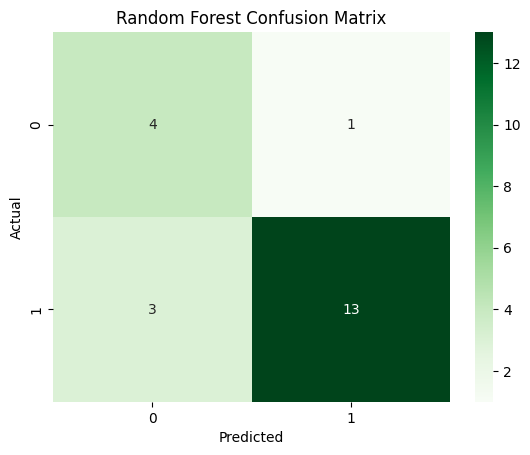

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
import joblib
import os

os.makedirs('C:/Users/rohit/depression-risk-predictor/models', exist_ok=True)
joblib.dump(rf_model, 'C:/Users/rohit/depression-risk-predictor/models/random_forest_model.pkl')
joblib.dump(scaler, 'C:/Users/rohit/depression-risk-predictor/models/scaler.pkl')


['C:/Users/rohit/depression-risk-predictor/models/scaler.pkl']